# NLP II: Grammar in NLP

You have here the resources to learn how to gramaticaly analyze texts.

## Libraries and installation
### NLTK

First we need to import the NLTK library. However, we can take advantage of the library created in our previous notebook!!

Go ahead and import your handmade library called `tokenization.py`:

In [1]:
# Type your code here:
from Libraries import tokenization

Import some more libraries:

In [2]:
import nltk # Why we need to import nltk?! Is it clear?
from nltk.chunk.regexp import *

In [3]:
my_phrase = 'I want a dress for a wedding'
tokens = tokenization.tokenize(my_phrase, 'english')
print(tokens)

['i', 'want', 'a', 'dress', 'for', 'a', 'wedding']


**Morphological Analysis:** refers to the process of examining and identifying the smallest meaningful units (or morphemes) of a word. This can help in understanding a word's structure, its roots, prefixes, and suffixes, and can be crucial in languages with rich morphological structures.

In [4]:
nltk.pos_tag(tokens)

[('i', 'NN'),
 ('want', 'VBP'),
 ('a', 'DT'),
 ('dress', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('wedding', 'NN')]

Did the cell execute successfully? Before diving in, you may need to install certain components. But no worries, you're already well-acquainted with such installations!

Upon successful execution of the cell, you'll be presented with an array of tuples. Each tuple comprises two elements:

1) **Token (or Word):** The individual word or symbol from the text.
2) **Part-of-Speech (POS) Tag:** This tag is derived from morphological analysis and indicates the grammatical role of the token in its context.

Here are some commonly encountered POS tags and their meanings:

* **'NN':** Noun — Refers to entities such as people, places, objects, ideas, or concepts. Examples include 'car' and 'city'.
* **'DT':** Determiner — These are words that introduce nouns and help clarify their context. Examples are 'the', 'an', and 'this'.
* **'VBP':** Verb, non-3rd person singular present — Represents verbs that aren't restricted to third-person singular usage. For instance, 'run' in the sentence 'They run'.
* **'IN':** Preposition or subordinating conjunction — These words articulate spatial or temporal relations, like 'in', 'before', 'after', and 'under'.

POS tagging via `nltk.pos_tag` provides invaluable insights into the grammatical roles words play within sentences. Such insights underpin numerous NLP tasks, including parsing and entity recognition.

**Syntactic Analysis:** often referred to as parsing, involves examining and identifying the grammatical structure of a sentence. It determines the relationships between words and how they come together to convey meaning. Through syntactic analysis, one can identify subjects, predicates, objects, and other grammatical constructs in a sentence. This information is vital for tasks like machine translation, question answering, and many other NLP applications.

In [5]:
from nltk.corpus import treebank

Let us see an in-built example from the library.

In [6]:
t = treebank.parsed_sents('wsj_0001.mrg')
t

[Tree('S', [Tree('NP-SBJ', [Tree('NP', [Tree('NNP', ['Pierre']), Tree('NNP', ['Vinken'])]), Tree(',', [',']), Tree('ADJP', [Tree('NP', [Tree('CD', ['61']), Tree('NNS', ['years'])]), Tree('JJ', ['old'])]), Tree(',', [','])]), Tree('VP', [Tree('MD', ['will']), Tree('VP', [Tree('VB', ['join']), Tree('NP', [Tree('DT', ['the']), Tree('NN', ['board'])]), Tree('PP-CLR', [Tree('IN', ['as']), Tree('NP', [Tree('DT', ['a']), Tree('JJ', ['nonexecutive']), Tree('NN', ['director'])])]), Tree('NP-TMP', [Tree('NNP', ['Nov.']), Tree('CD', ['29'])])])]), Tree('.', ['.'])]), Tree('S', [Tree('NP-SBJ', [Tree('NNP', ['Mr.']), Tree('NNP', ['Vinken'])]), Tree('VP', [Tree('VBZ', ['is']), Tree('NP-PRD', [Tree('NP', [Tree('NN', ['chairman'])]), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('NP', [Tree('NNP', ['Elsevier']), Tree('NNP', ['N.V.'])]), Tree(',', [',']), Tree('NP', [Tree('DT', ['the']), Tree('NNP', ['Dutch']), Tree('VBG', ['publishing']), Tree('NN', ['group'])])])])])]), Tree('.', ['.'])])]

Above, you can observe the tree structure representing the hierarchical relationships of the processed phrases. This visual representation breaks down the syntactic roles and relationships within the sentence.

Let's visualize the structure using a tree diagram to better understand the hierarchical relationships within the data.

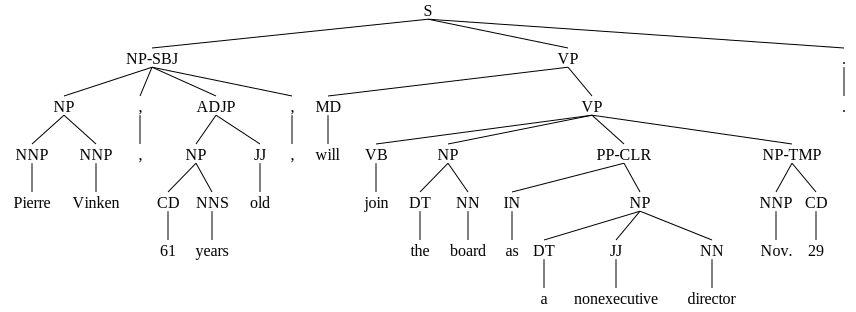

In [7]:
t[0]

In the provided image, you can observe the 'sintagma,' or the complete phrase in the top node. Following down, the subject is denoted as 'NP-SBJ'. As we traverse down the branches, we encounter various components that finally lead to the leaves, which are the individual words (tokens) like 'Pierre', 'Vinken', and so on.

In essence, this representation organizes and analyzes the different components of the sentence, highlighting their syntactic relationships.

Other manner to see the tree structure is the following:

In [8]:
print(t[0])

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


**Semantic Analysis:** While syntactic analysis deals with the structure and grammar of sentences, semantic analysis delves into the meaning of those sentences. One of the key tasks in semantic analysis is Named Entity Recognition (NER).

Using NER, you can extract entities such as people's names, company names, geographical locations, and more, from a body of text. This is particularly useful in various NLP applications like information retrieval, question answering, and knowledge graph construction.

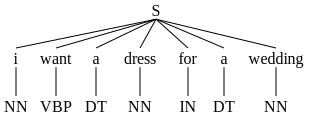

In [9]:
entities = nltk.chunk.ne_chunk(nltk.pos_tag(tokens))
entities

#### Context-Free Grammar (CFG)

In natural language processing (NLP), the creation, understanding, and generation of language structures frequently necessitate the use of formal grammars. One prevalent type of formal grammar is the Context-Free Grammar (CFG).

CFG operates without prior context for analyzing a phrase. It doesn't depend on previous tags or any morphological analysis. Essentially, with CFG, we start with a clean slate. We're given raw tokens, and we designate the role of each token explicitly: this token signifies X, that token represents Y, etc. By categorizing these tokens through these declarations, they collectively form higher-level structures, painting the broader picture that is the CFG.

It's noteworthy that there are other grammatical structures, which rely on pre-trained tags to form definitions or categories. These are frequently employed in certain NLP contexts, and we will see them in the near future :)


Below, there is an **example** of tree creation with a custom CFG for my phrase:

"I want a dress for a wedding"

Earlier, after performing a morphological analysis on the phrase, the output we received was:

```
[('i', 'NN'),
 ('want', 'VBP'),
 ('a', 'DT'),
 ('dress', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('wedding', 'NN')]
 ```

This output gives us individual tags for each token. Using these tags, we can define our CFG rules. Each line encapsulated between the triple quotes (""") represents a rule. The order of these rules progresses from the least restrictive to the most restrictive.

Rules are made of two parts: the label to be assiged first, and the rules that must accomplish secondly. 

Our rules will be for the more specific (basic) rules: Det, N, etc.

`Det -> 'a'`\
`N -> 'dress' | 'wedding'` (`|` stands for or)\
etc.

And fot the more generic rules: S, PP, etc. These broader, more composite rules illustrate how the smaller rules connect and interact.

These CFG rules help in understanding the hierarchical and structural relationships between different tokens in a sentence, crucial for several NLP tasks.

In [10]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'i'
VP -> V NP | VP PP
Det -> 'a'
N -> 'dress' | 'wedding'
V -> 'want'
P -> 'for'
""")

These are all the rules needed to tag the phrase "I want a dress for a wedding."

**Disadvantages:** This approach to grammar is quite manual. Consider a variant of the phrase: "I want shoes for a wedding." Our current grammar would be insufficient because it doesn't account for the word "shoes."  :(

However, such a manual approach can be useful in specific contexts, especially when there's limited variability in input phrases or when most inputs are quite similar. While this basic form of grammar isn't the most commonly used, it's foundational knowledge that's essential for anyone diving into the world of NLP.

As mentioned before, for more intricate and variable phrases, grammars built around trained taggers are usually preferred. With these, a trained tagger assigns labels to words. We then construct rules based on these labels rather than the specific words themselves. This method allows us to focus on structures like S -> NP VP and PP -> P NP, without being overly concerned about individual words, the part of the code with Det -> 'a', N -> 'dress' | 'wedding', etc.

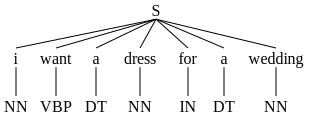

In [11]:
entities = nltk.chunk.ne_chunk(nltk.pos_tag(tokens))
entities

In [12]:
parser = nltk.ChartParser(grammar, trace=1)

In [13]:
def parse_cfg(_tokens):
    return parser.parse(_tokens)

In [14]:
for tree in parse_cfg(tokens):
    print(tree, '\n')
    tree.pretty_print()
    print('------------------------------------------------------')


|.  i  . want.  a  .dress. for .  a  .weddi.|
|[-----]     .     .     .     .     .     .| [0:1] 'i'
|.     [-----]     .     .     .     .     .| [1:2] 'want'
|.     .     [-----]     .     .     .     .| [2:3] 'a'
|.     .     .     [-----]     .     .     .| [3:4] 'dress'
|.     .     .     .     [-----]     .     .| [4:5] 'for'
|.     .     .     .     .     [-----]     .| [5:6] 'a'
|.     .     .     .     .     .     [-----]| [6:7] 'wedding'
|[-----]     .     .     .     .     .     .| [0:1] NP -> 'i' *
|[----->     .     .     .     .     .     .| [0:1] S  -> NP * VP
|.     [-----]     .     .     .     .     .| [1:2] V  -> 'want' *
|.     [----->     .     .     .     .     .| [1:2] VP -> V * NP
|.     .     [-----]     .     .     .     .| [2:3] Det -> 'a' *
|.     .     [----->     .     .     .     .| [2:3] NP -> Det * N
|.     .     [----->     .     .     .     .| [2:3] NP -> Det * N PP
|.     .     .     [-----]     .     .     .| [3:4] N  -> 'dress' *
|.     .     [---

As you can observe from the output, there are two distinct trees. These represent two unique ways to interpret our phrase based on the established rules. Both interpretations are compatible and plausible within the constraints of the provided rules.

This phenomenon is known as **structural ambiguity**. It arises when a single sequence of words or tokens can be parsed in multiple ways due to ambiguous grammatical constructs. This is a common phenomenon in natural languages and showcases the richness and complexity of human language.

For instance, consider the sentence: "I saw the man with the telescope." Depending on how you parse it, the meaning can be "I used a telescope to see the man" or "I saw the man who had a telescope."

In the context of CFG and NLP, handling such ambiguities is crucial. Different parse trees can lead to different semantic interpretations of a sentence, which can significantly impact tasks like information extraction, question answering, and more.

#### Custom tagger

Creating a custom tagger allows you to specifically tailor the tagging process to your needs. This can be particularly useful if you're working with texts in a specialized domain, or if the standard taggers don't perform well for your specific use case.

In [15]:
from nltk import UnigramTagger, BigramTagger, TrigramTagger #N-Gram

An **N-gram** is a contiguous sequence of *n* items (such as characters, words, or tokens) from a given text or speech. They help capture the language structure, like phrasing, from a statistical point of view.

Depending on the value of *n*, the type of **N-gram** is defined:

- 1-gram (or unigram): A single item, e.g., "apple"
- 2-gram (or bigram): A sequence of 2 contiguous items, e.g., "apple pie"
- 3-gram (or trigram): A sequence of 3 contiguous items, e.g., "I love you"
- ... and so on.

N-grams provide a way to convert text data into a format that can be used for statistical analysis. For instance, bigrams can capture a bit of context, making them more informative than unigrams. But, the longer the N-gram (i.e., the higher the *n*), the sparser the statistical representation will become, which can be a challenge for tasks like language modeling.

In [16]:
corpus = [
    'The kid have a lolipop',
    'The women bought a car',
    'The man is cooking a chicken'
]

In [17]:
corpus_tokens = []

for phrase in corpus:
    corpus_tokens.append(tokenization.tokenize(phrase))

corpus_tokens

[['the', 'kid', 'have', 'a', 'lolipop'],
 ['the', 'women', 'bought', 'a', 'car'],
 ['the', 'man', 'is', 'cooking', 'a', 'chicken']]

Now that we have our elements, N-grams require us to tag the sentences. Let's create a training set and label our sentences.

[ [('token', 'tag') , ...] , ['array_with_phrase_2'] , ... ]

In [18]:
tagged_corpus = [
    [('The', 'art'), ('kid', 'suj'), ('have', 'action'), ('a', 'det'), ('lolipop', 'obj')],
    [('The', 'art'), ('women', 'suj'), ('bought', 'action'), ('a', 'det'), ('car', 'obj')],
    [('the', 'art'), ('man', 'suj'), ('is', 'action'), ('cooking', 'action'), ('a', 'det'), ('chicken', 'obj')]
]

uni = UnigramTagger(tagged_corpus)
bi = BigramTagger(tagged_corpus)
tri = TrigramTagger(tagged_corpus)

In [19]:
uni.tag(corpus_tokens[0])

[('the', 'art'),
 ('kid', 'suj'),
 ('have', 'action'),
 ('a', 'det'),
 ('lolipop', 'obj')]

Note that I intentionally chose one of the training items to be 'the' in lowercase; otherwise, 'the' would not be recognized.

**Give it a try!!!**

Let us see the differences between uni, bi and tri-gram taggers:

In [20]:
tri.tag(tokenization.tokenize('The granny ates a lolipop'))

[('the', 'art'),
 ('granny', None),
 ('ates', None),
 ('a', None),
 ('lolipop', None)]

In [21]:
uni.tag(tokenization.tokenize('The granny eats a lolipop'))

[('the', 'art'),
 ('granny', None),
 ('eats', None),
 ('a', 'det'),
 ('lolipop', 'obj')]

The unigram tagger, `uni` recognizes 'the', 'a' and 'lollipop' because they were part of the training set. Contrary, the words 'granny' and 'eats' are left untagged because they were not part of the training data given to the unigram tagger.

To address the limitations of trigram taggers, one approach is to implement a backoff strategy. With this method, if the bigram or the trigram tagger is unable to determine a tag for a particular token, it "falls back" to using a unigram tagger. This hierarchical approach increases the likelihood of assigning an accurate tag, even when specific trigram or bigram contexts are not present in the training data.

In [22]:
uni = UnigramTagger(tagged_corpus)
bi = BigramTagger(tagged_corpus, backoff=uni)
tri = TrigramTagger(tagged_corpus, backoff=uni)

tri.tag(tokenization.tokenize('The granny eats a lolipop'))

[('the', 'art'),
 ('granny', None),
 ('eats', None),
 ('a', 'det'),
 ('lolipop', 'obj')]

In this way, by implementing a backoff strategy, we enhance the robustness of our tagger, decreasing the instances where it cannot assign a tag (`None`). This ensures a more comprehensive tagging across various contexts, especially when encountering unfamiliar or less frequent sequences in the input text.

Let's now retrain to improve our algorithm. These types of algorithms need to be trained from scratch.

In [23]:
tagged_corpus.append(
    [('The', 'art'),
     ('granny', 'suj'),
     ('eats', 'action'),
     ('an', 'det'),
     ('apple', 'obj')])

uni = UnigramTagger(tagged_corpus)
bi = BigramTagger(tagged_corpus, backoff=uni)
tri = TrigramTagger(tagged_corpus, backoff=uni)

In [24]:
uni.tag(tokenization.tokenize('The granny eats an apple'))

[('the', 'art'),
 ('granny', 'suj'),
 ('eats', 'action'),
 ('an', 'det'),
 ('apple', 'obj')]

#### Resources

"EAGLES" guidelines is a set of standards for the creation and representation of linguistic resources, especially in European languages. EAGLES stands for "Expert Advisory Group on Language Engineering Standards."

For Spanish, in particular, EAGLES has provided a set of morphosyntactic tagset guidelines which are widely used in corpus annotation projects. The tagset can describe various linguistic properties such as gender (masculine/feminine), number (singular/plural), tense (present/past/future), mood (indicative/subjunctive/imperative), and more.

https://www.cs.upc.edu/~nlp/tools/parole-sp.html

See for instance 5.NOMBRES. In the examples, 'chico' is labeled as 'NCMS000'. This label comes from the table used for tagging. As you can see, it means N(ombre)C(omún)M(asculino)S(ingular)000.

Easy, right?